<a href="https://www.kaggle.com/code/timschmidt2/notebookcreditcard?scriptVersionId=117046125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Vorhersage zu Kundenabwanderung einer Bank**

**von Ruslan Muzuchoev und Philipp Kreis** 

Datensatz BankChurners.csv

Wir versuchen mit unserem Notebook:
1. die Faktoren zu identifizieren und visualisieren, welche zur Kundenabwanderung beitragen 
2. ein Modell erstellen, das eine Vorhersage trifft, welche Kunden bald abwandern könnten

In [1]:
# Datenaufbereitung:
import numpy as np
import pandas as pd

# Datenvisualisierung:
import matplotlib.pyplot as plt
import seaborn as sns

**Daten laden**

In [2]:
df = pd.read_csv("/kaggle/input/bankdata/BankChurners.csv")

# Exploratory Data Analysis

In [3]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
# die letzten beiden Spalten werden nicht gebraucht
df = df.drop(df.columns[-2:], axis=1)

df = df.drop('CLIENTNUM', axis=1)

In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
# Schneller Überblick über die Daten von Dataframes
print(df.tail())

          Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25           

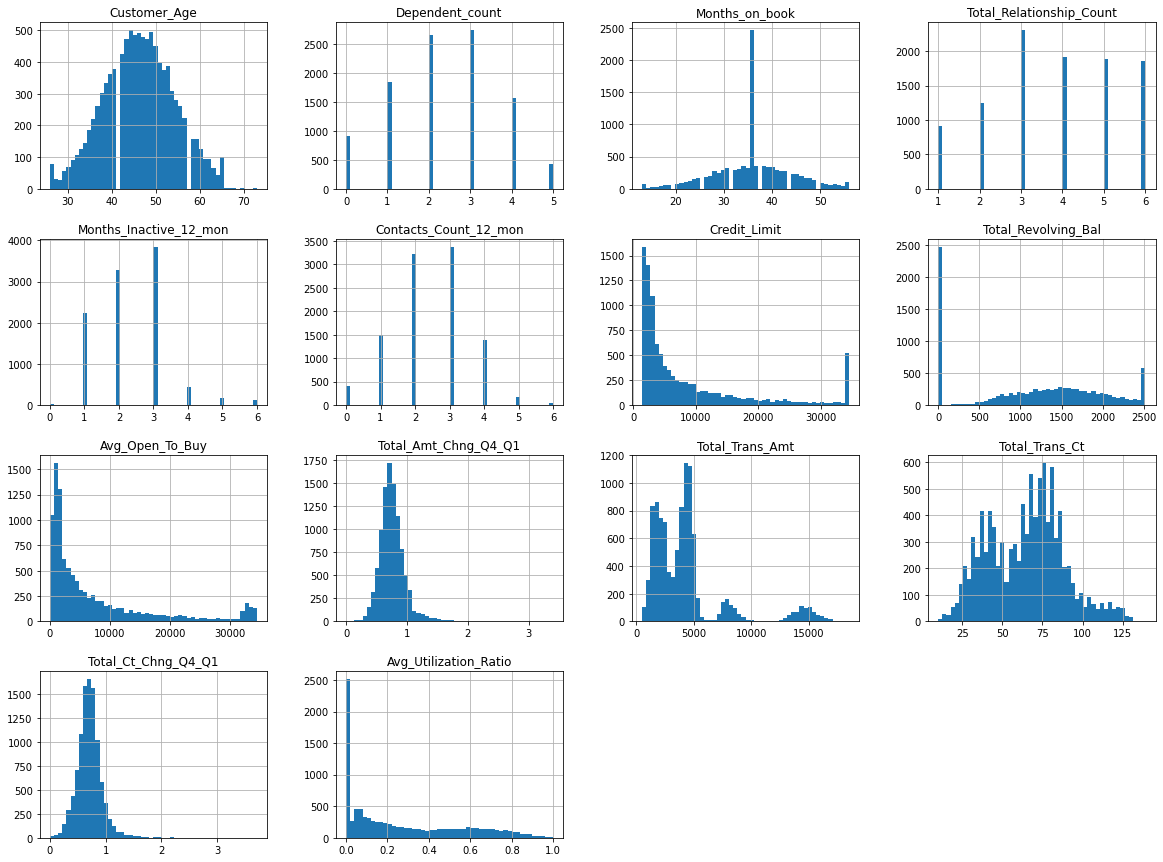

In [8]:
#Histogramm für jedes numerisches Feature des Dataframes
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# numerischen Werte der Korrelationen zw. Attributen 
# 1 Attribute perfekt korreliert
# -1 Attribute perfekt negativ korreliert
# 0 unabhängig voneinander
corr_matrix = df.corr()
print(corr_matrix)

                          Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1      

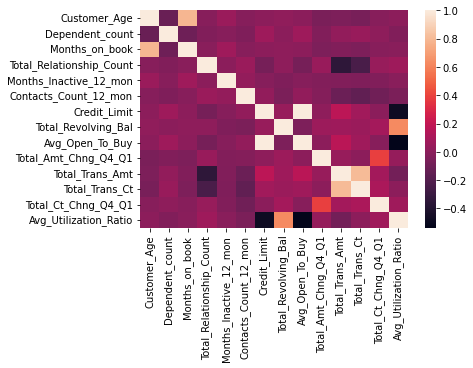

In [10]:
# Korrelationen zw. verschiedenen Attributen des Dataframes 
# Farbe näher an Rot, desto höher ist die Korrelation
# Farbe an Blau ist, desto geringer ist die Korrelation.
sns.heatmap(corr_matrix)
plt.show()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


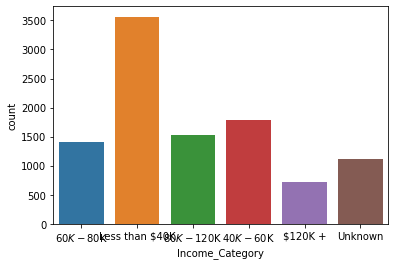

In [11]:
#Einkommenskategorie
print(df['Income_Category'].value_counts())
sns.countplot(x='Income_Category', data=df)
plt.show()

F    5358
M    4769
Name: Gender, dtype: int64


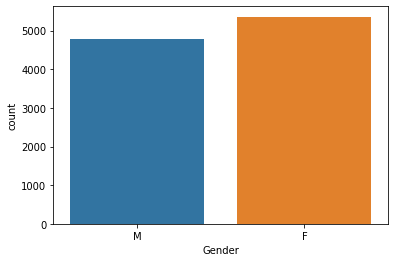

In [12]:
# Geschlecht
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)
plt.show()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


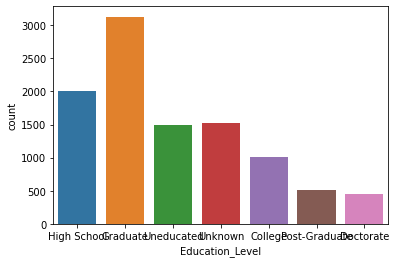

In [13]:
# Bildungsgrad
print(df['Education_Level'].value_counts())
sns.countplot(x='Education_Level', data=df)
plt.show()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


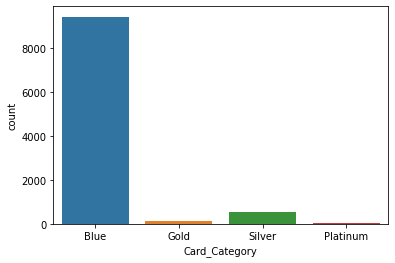

In [14]:
# Kartenkategorie
print(df['Card_Category'].value_counts())
sns.countplot(x='Card_Category', data=df)
plt.show()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


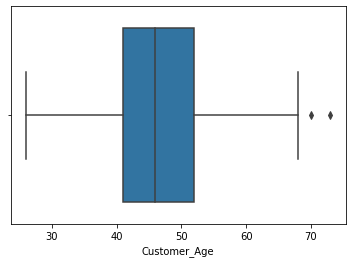

In [15]:
# Alter des Kunden
print(df['Customer_Age'].describe())
sns.boxplot(x='Customer_Age', data=df)
plt.show()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64


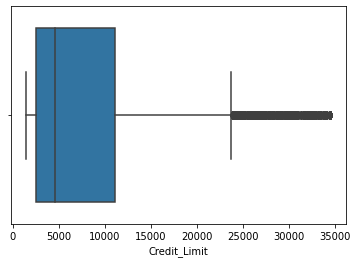

In [16]:
# Kreditrahmen
print(df['Credit_Limit'].describe())
sns.boxplot(x='Credit_Limit', data=df)
plt.show()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64


<AxesSubplot:xlabel='Total_Trans_Amt'>

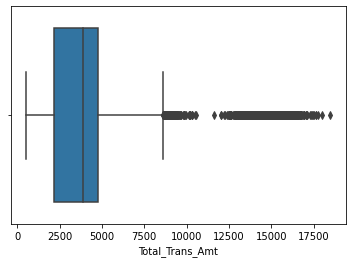

In [17]:
#Gesamter Transaktionsbetrag
print(df['Total_Trans_Amt'].describe())
sns.boxplot(x='Total_Trans_Amt', data=df)

# Preprocessing

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, RocCurveDisplay, precision_score, recall_score

In [19]:
df = df.replace('Unknown', np.NaN)

In [20]:
y = df["Attrition_Flag"]
# X = df.drop(columns =["Attrition_Flag"] , inplace = True)
X = df[["Customer_Age","Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Credit_Limit","Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Trans_Amt", "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"]]

In [21]:
y = np.where(y=="Attrited Customer", 1, 0)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def preprocessfn(data, num_cols, cat_cols, feature_names=False):
    imp = SimpleImputer(strategy="most_frequent")
    imputed = pd.DataFrame(imp.fit_transform(data), columns=data.columns)
    oneh = OneHotEncoder()
    scaler = StandardScaler()

    categorical = pd.get_dummies(imputed[cat_cols])
    numeric = scaler.fit_transform(imputed[num_cols])

    col_names = list(categorical.columns) + num_cols 

    if feature_names:
        return np.concatenate((categorical.values, numeric), axis=1), col_names

    return np.concatenate((categorical.values, numeric), axis=1)

In [24]:
num_cols = ["Customer_Age"] + list(X.columns[7:])
cat_cols = ["Gender", "Dependent_count", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# Model Comparison

In [25]:
lr = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

models = [lr, rf, knn]

In [26]:
for model in models:
    model.fit(preprocessfn(X_train, num_cols, cat_cols), y_train)
    print(model, model.score(preprocessfn(X_test, num_cols, cat_cols), y_test))


# wir wählen RandomForest für das weitere Vorgehen da dieser am vielversprechendsten ist.

LogisticRegression() 0.8963474827245804
RandomForestClassifier() 0.9466929911154985
KNeighborsClassifier() 0.9057255676209279


# Hyperparameter Optimierung

In [27]:
param_grid = {"n_estimators":[150], "max_depth":[7, 10, 13], "min_samples_split":[6,8,10]}
# param_grid = {"n_estimators":[50, 100, 150], "max_depth":[7, 10, 13], "min_samples_split":[6,8,10]}

In [28]:
# hypterparameter Optimierung
cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring="f1") # "accuracy"], refit=False) # ["recall", "precision"]
print(cv)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [150]},
             scoring='f1')


In [29]:
cv.fit(preprocessfn(X_train, num_cols, cat_cols), y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 13],
                         'min_samples_split': [6, 8, 10],
                         'n_estimators': [150]},
             scoring='f1')

In [30]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.067017,0.016895,0.035602,0.000109,7,6,150,"{'max_depth': 7, 'min_samples_split': 6, 'n_es...",0.669834,0.757238,0.716981,0.719258,0.745536,0.721769,0.030164,9
1,1.056204,0.010830,0.035965,0.000391,7,8,150,"{'max_depth': 7, 'min_samples_split': 8, 'n_es...",0.660241,0.753880,0.720000,0.733179,0.746606,0.722781,0.033352,8
2,1.068583,0.004973,0.036811,0.001228,7,10,150,"{'max_depth': 7, 'min_samples_split': 10, 'n_e...",0.674641,0.762749,0.725995,0.722222,0.752212,0.727564,0.030586,7
3,1.309679,0.013976,0.041046,0.000554,10,6,150,"{'max_depth': 10, 'min_samples_split': 6, 'n_e...",0.755056,0.802575,0.792952,0.813853,0.826271,0.798141,0.024253,5
4,1.294245,0.019832,0.040557,0.000390,10,8,150,"{'max_depth': 10, 'min_samples_split': 8, 'n_e...",0.779510,0.806794,0.800000,0.810458,0.823779,0.804108,0.014536,4
5,1.290503,0.008160,0.040894,0.000442,10,10,150,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.761693,0.800000,0.786667,0.806941,0.828753,0.796811,0.022223,6
6,1.397652,0.005088,0.044271,0.001724,13,6,150,"{'max_depth': 13, 'min_samples_split': 6, 'n_e...",0.797386,0.836820,0.818966,0.836518,0.854167,0.828771,0.019240,1
7,1.406941,0.013407,0.043037,0.000549,13,8,150,"{'max_depth': 13, 'min_samples_split': 8, 'n_e...",0.800857,0.828452,0.817204,0.841438,0.850622,0.827715,0.017581,2
8,1.390907,0.010317,0.042794,0.000273,13,10,150,"{'max_depth': 13, 'min_samples_split': 10, 'n_...",0.803493,0.831276,0.811159,0.829060,0.855967,0.826191,0.018231,3


In [31]:
col_names = np.array(preprocessfn(X_train, num_cols, cat_cols, feature_names=True)[1])

In [32]:
pd.DataFrame([col_names, cv.best_estimator_.feature_importances_]).transpose().sort_values(by=1, ascending=False)

,0,1
34,Total_Trans_Amt,0.188759
35,Total_Trans_Ct,0.175114
36,Total_Ct_Chng_Q4_Q1,0.129734
32,Total_Revolving_Bal,0.106295
37,Avg_Utilization_Ratio,0.076782
28,Total_Relationship_Count,0.064675
31,Credit_Limit,0.035381
33,Avg_Open_To_Buy,0.033342
26,Customer_Age,0.032027
30,Contacts_Count_12_mon,0.030443


# Precision Recall

In [33]:
y_pred = cv.predict(preprocessfn(X_test, num_cols, cat_cols))

In [34]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([1699,  327]))

In [35]:
confusion_matrix(y_test, y_pred)
# 237 Leute, die abgewandert sind, wurden richtig vorhergesagt.

array([[1679,   20],
       [  93,  234]])

In [36]:
precision_score(y_test, y_pred)

0.9212598425196851

In [37]:
recall_score(y_test, y_pred)

0.7155963302752294

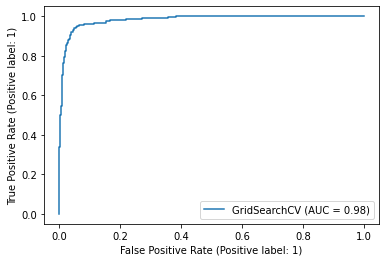

In [38]:
RocCurveDisplay.from_estimator(cv, preprocessfn(X_test, num_cols, cat_cols), y_test)